In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LTSM)
#            To predict the closing price of BITCOIN Using the past 60 day price.


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import pandas_datareader as web

In [7]:
dfff = web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end='2020-11-25')
dfff


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2020-11-22,18688.968750,17671.384766,18642.232422,18370.001953,41280434225,18370.001953
2020-11-23,18711.425781,18000.796875,18370.017578,18364.121094,42741112307,18364.121094
2020-11-24,19348.271484,18128.656250,18365.015625,19107.464844,51469565008,19107.464844


In [8]:
#Get the number of rows and columns in the data set 
dfff.shape

(2157, 6)

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
import pandas_datareader as web

In [12]:
dfff = web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end='2020-11-25')
dfff

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2020-11-22,18688.968750,17671.384766,18642.232422,18370.001953,41280434225,18370.001953
2020-11-23,18711.425781,18000.796875,18370.017578,18364.121094,42741112307,18364.121094
2020-11-24,19348.271484,18128.656250,18365.015625,19107.464844,51469565008,19107.464844


In [13]:
dfff.shape

(2157, 6)

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

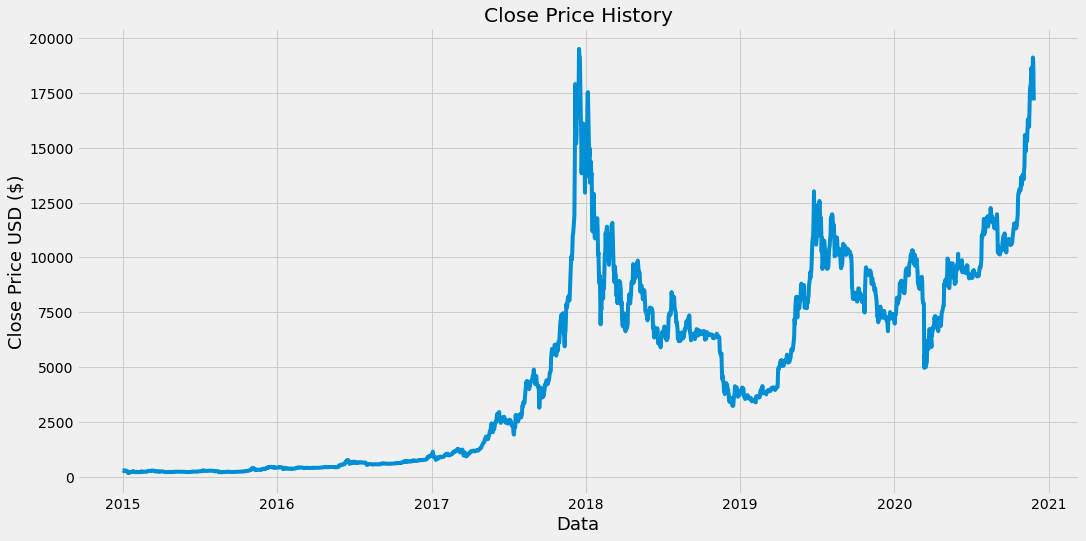

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfff['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
import math

In [17]:
#Create a new dataframe with only the 'Close column'
data = dfff.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1726

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00704715],
       [0.00708768],
       [0.00533037],
       ...,
       [0.97981627],
       [0.96038783],
       [0.87852678]])

In [20]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print

[array([0.00704715, 0.00708768, 0.00533037, 0.00445627, 0.00498833,
       0.00559472, 0.00601647, 0.00544771, 0.0058131 , 0.005005  ,
       0.0045321 , 0.00464266, 0.00247204, 0.        , 0.00164297,
       0.00155254, 0.00109512, 0.00166859, 0.00190266, 0.00171911,
       0.00252566, 0.00286258, 0.0028353 , 0.00361007, 0.00391396,
       0.00493651, 0.004419  , 0.00288892, 0.00286812, 0.00250123,
       0.00203739, 0.00252954, 0.00311223, 0.00254487, 0.00252338,
       0.00201912, 0.00228595, 0.00257002, 0.00234527, 0.00217435,
       0.00216033, 0.00212647, 0.00225997, 0.00296719, 0.00410046,
       0.00293603, 0.0028852 , 0.00339075, 0.00301372, 0.00321854,
       0.0033995 , 0.00343858, 0.00299566, 0.00314654, 0.00313842,
       0.00307294, 0.0030189 , 0.00391966, 0.00394217, 0.00424959])]
[0.0050502362799632605]
[array([0.00704715, 0.00708768, 0.00533037, 0.00445627, 0.00498833,
       0.00559472, 0.00601647, 0.00544771, 0.0058131 , 0.005005  ,
       0.0045321 , 0.00464266, 0.0

In [21]:
import numpy as np

In [22]:
#Convert the x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
#Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1666, 60, 1)

In [25]:
from tensorflow.keras import Sequential


In [26]:
from tensorflow.keras.layers import Dense

In [27]:
from tensorflow.keras.layers import LSTM

In [28]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1666/1666 [==============================] - 51s 31ms/step - loss: 0.0021


In [31]:
#Create the testing data set
#Create new array containing scaled values from index 1666 to 2166
test_data = scaled_data[training_data_len - 60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [32]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [33]:
#Reshape data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [34]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [35]:
#Get the route mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

90.79375271896751

<ipython-input-37-807b1149352b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


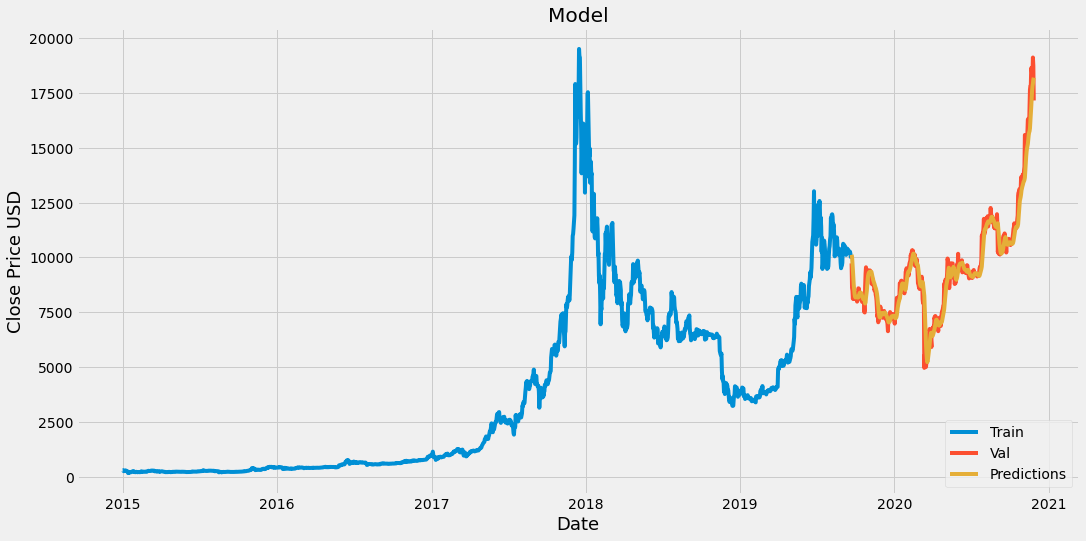

In [37]:
#plot data 
train = data[:training_data_len:]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()


In [38]:
#Show the Valid and Predicted Prices
valid

,Close,Predictions
Date,,
2019-09-22,9729.324219,10120.528320
2019-09-23,8620.566406,10033.231445
2019-09-24,8486.993164,9767.240234
2019-09-25,8118.967773,9437.897461
2019-09-26,8251.845703,9068.853516
...,...,...
2020-11-22,18370.001953,17585.781250
2020-11-23,18364.121094,17803.490234
2020-11-24,19107.464844,17921.375000


In [45]:
import pandas_datareader as web

In [46]:
#Get the Quote
btc_quote = web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end='2020-11-25')
btc_quote


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2020-11-22,18688.968750,17671.384766,18642.232422,18370.001953,41280434225,18370.001953
2020-11-23,18711.425781,18000.796875,18370.017578,18364.121094,42741112307,18364.121094
2020-11-24,19348.271484,18128.656250,18365.015625,19107.464844,51469565008,19107.464844


In [50]:
#Create a new dataframe
new_df = btc_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[17948.38]]


In [51]:
#Get the Quote_2
btc_quote_2 = web.DataReader('BTC-USD', data_source='yahoo', start='2020-11-25', end='2020-11-25')
btc_quote_2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-25,19390.964844,18581.146484,19104.410156,18732.121094,43710357371,18732.121094
2020-11-26,18866.285156,16351.035156,18729.839844,17150.623047,61396835736,17150.623047


In [53]:
print(btc_quote_2['Close'])

Date
2020-11-25    18732.121094
2020-11-26    17150.623047
Name: Close, dtype: float64
